<a href="https://colab.research.google.com/github/valeriafigueredo-data/modelos_preditivos_classicos/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelos preditivos clássicos**



Sala: 01

Alunos:

* Arthur Wanderley Ferreira dos Santos (awfs@cesar.school)
* André Felipe Bezerra de Souza Leão (afbsl@cesar.school)
* Manuela de Lacerda Bezerra Carvalho (mlbc@cesar.school)
* Valéria Cristina Andrade Rodrigues de Figueredo (vcarf@cesar.school)
* Thiago Wanderley Amorim (twa@cesar.school)

# K Nearest Neighbors - Projeto

O objetivo deste exercício é dar continuidade com os estudos de Análise Exploratória dos Dados (EDA) e já começar a treinar modelos de classificação com k-NN conforme visto em sala de aula.

Vamos utilizar a base de dados Wine da [UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality). A variável de resposta que temos que modelar é a qualidade do vinho (quality).

Nesse repositório, há dois conjuntos de dados, um com informações de vinho tinto e outra para vinho branco. Esses dados foram extraídos de uma vinícula do Norte de Portugal. Para este exercício, vamos utilizar a base de dados de vinho tinto.

Dicionário da base de dados:
1. acidez fixa / fixed acidity.
2. acidez volátil / volatile acidity
3. ácido cítrico / citric acid
4. açúcar residual / residual sugar
5. cloretos / chlorides
6. dióxido de enxofre livre / free sulfur dioxide
7. dióxido de enxofre total / total sulfur dioxide
8. densidade / density
9. pH / pH
10. sulfatos / sulphates
11. álcool/ alcohol
12. **qualidade - quality (score between 0 and 10)**


## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor

## Obtenha os dados
** Leia o arquivo csv 'winequality-white.csv' em um DataFrame **

In [546]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

** Verifique o cabeçalho do DataFrame.**

In [547]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Análise descritiva dos dados

Info - Informações básica do conjunto de dados, tais como tipo de dado e dados faltantes.

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Describe - Informações de estatística descritiva de dados, tais como média, mediana e desvio-padrão.

In [549]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


missingno - Analisa se há dados faltantes ou não.
https://github.com/ResidentMario/missingno

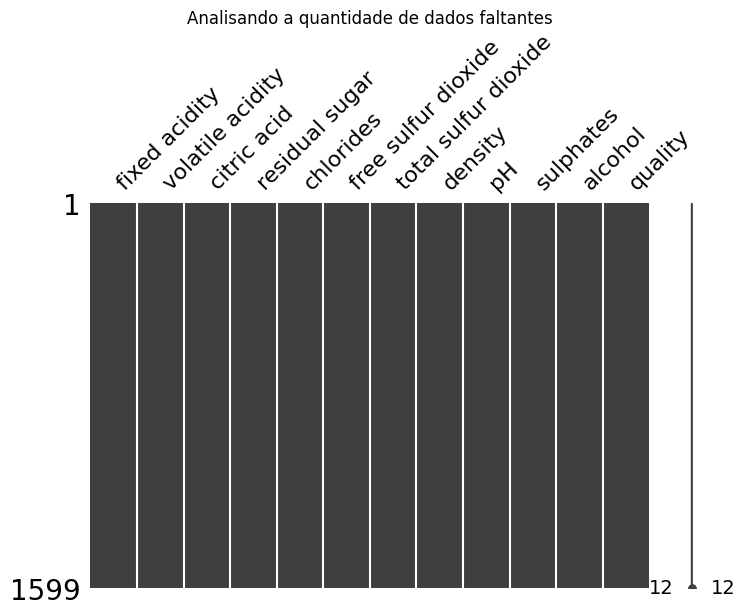

In [550]:
msno.matrix(df, figsize=(8,5))
plt.title("Analisando a quantidade de dados faltantes")
plt.show()

Histograma - Verifica a distribuição dos dados.

<ipython-input-551-f9e533ec2085>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax, grid=False)


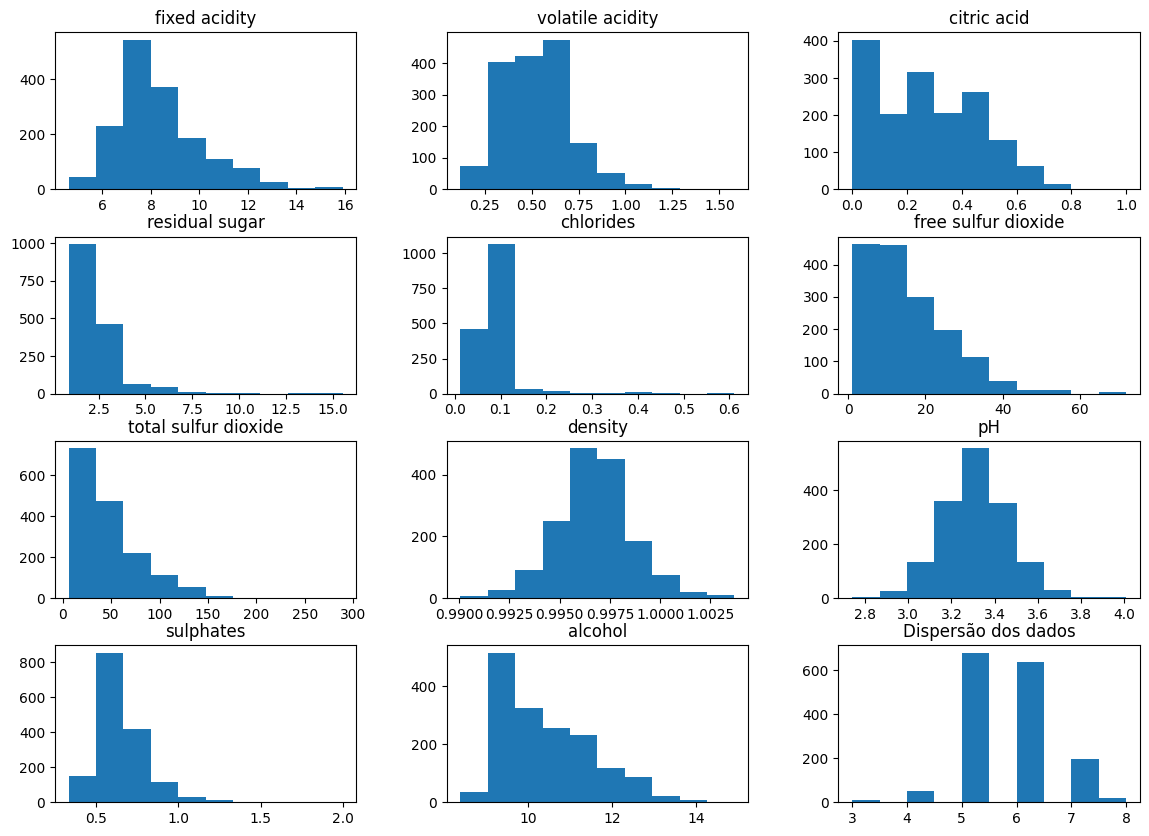

In [551]:
fig = plt.figure(figsize = (14,10))
ax = fig.gca()
df.hist(ax = ax, grid=False)
plt.title("Dispersão dos dados")
plt.show()

Análise de Correlação - Verifica a corelação linear entre os dados

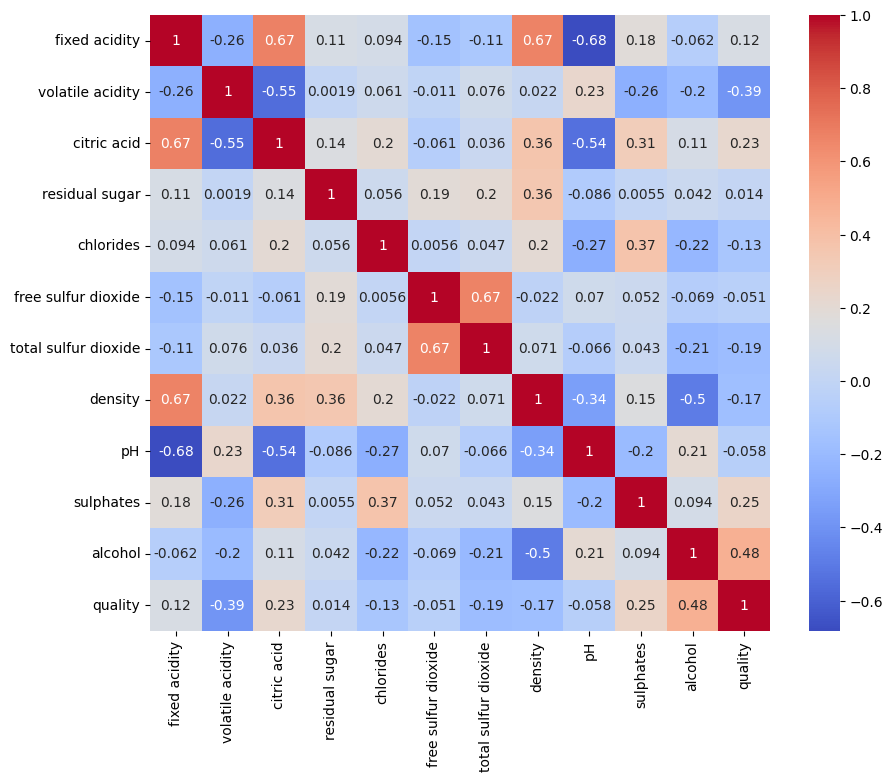

In [552]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [553]:
from sklearn.model_selection import train_test_split

In [554]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['quality']),
                                                    df['quality'],
                                                    test_size=0.25,
                                                    random_state=111)

**Dados de treino**

Features

In [555]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
169,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.99640,3.00,1.59,9.5
1219,9.0,0.390,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9
1158,6.7,0.410,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6
976,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4
654,8.6,0.470,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5
...,...,...,...,...,...,...,...,...,...,...,...
681,8.0,0.450,0.23,2.2,0.094,16.0,29.0,0.99620,3.21,0.49,10.2
1299,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9
724,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2


Target

In [556]:
y_train

,quality
169,5
1219,6
1158,6
976,5
654,5
...,...
681,6
1299,3
86,6
724,4


**Dados de teste**

Features

In [557]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
660,7.2,0.52,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6
1351,7.2,0.62,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8
230,5.2,0.48,0.04,1.6,0.054,19.0,106.0,0.99270,3.54,0.62,12.2
1111,5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3
444,5.3,0.57,0.01,1.7,0.054,5.0,27.0,0.99340,3.57,0.84,12.5
...,...,...,...,...,...,...,...,...,...,...,...
1345,8.2,0.44,0.24,2.3,0.063,10.0,28.0,0.99613,3.25,0.53,10.2
139,7.8,0.56,0.19,2.0,0.081,17.0,108.0,0.99620,3.32,0.54,9.5
926,9.4,0.24,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.2
929,8.7,0.33,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0


Target

In [558]:
y_test

,quality
660,6
1351,6
230,7
1111,7
444,7
...,...
1345,6
139,5
926,6
929,7


# Normalização as variáveis

Normalizar os dados. Utilize o StandardScaler do Scikit-learn.

Normalize as variáveis independentes com o StandardScaler

In [559]:
from sklearn.preprocessing import StandardScaler

In [560]:
scaler = StandardScaler()

Use o método transform () para transformar os parâmetros em uma versão padronizada.

In [561]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [562]:
X_train_scaled

array([[-0.47976189,  0.94906377, -0.15790918, ..., -2.00766871,
         5.2764302 , -0.8638051 ],
       [ 0.39980157, -0.77926695,  0.65950304, ..., -0.71448609,
         0.96354179,  0.44883249],
       [-0.9488624 , -0.66953167,  0.81276783, ...,  0.70801479,
         2.83624334,  0.16755301],
       ...,
       [ 0.16525132, -0.23059053,  0.04644388, ..., -2.46028263,
         7.31937734, -0.48876578],
       [-0.47976189,  3.19863709, -0.87314487, ...,  1.48392436,
        -0.34167444,  0.73011197],
       [-0.71431214, -0.34032582, -1.38402751, ...,  0.57869653,
        -0.4551715 ,  0.44883249]])

In [563]:
X_test_scaled


array([[-6.55674577e-01, -6.59876060e-02, -1.02640966e+00, ...,
         6.14234780e-02,  8.50044728e-01, -7.70045268e-01],
       [-6.55674577e-01,  4.82688813e-01, -1.33293925e+00, ...,
         6.14234780e-02, -8.52411222e-01,  1.29267094e+00],
       [-1.82842585e+00, -2.85458174e-01, -1.17967445e+00, ...,
         1.48392436e+00, -2.28177374e-01,  1.66771025e+00],
       ...,
       [ 6.34351827e-01, -1.60228158e+00,  3.01885195e-01, ...,
         1.03131044e+00,  1.36078151e+00, -2.07486302e-01],
       [ 2.23888880e-01, -1.10847280e+00,  5.57326514e-01, ...,
        -6.78947838e-02,  3.96056474e-01,  1.48019060e+00],
       [ 1.74846554e+00, -1.05360516e+00,  9.14944360e-01, ...,
        -2.39562350e+00, -1.18324712e-03, -1.14508458e+00]])

Análise descritiva dos dados através do describe

In [564]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03
mean,-7.111353e-17,-1.718577e-16,1.659316e-16,-1.333379e-16,-1.155595e-16,2.074145e-17,-8.889192e-17,7.994347e-15,-2.814911e-16,-1.363009e-16,3.022325e-16
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00
min,-2.180251e+00,-2.260693e+00,-1.384028e+00,-1.134243e+00,-1.555025e+00,-1.418910e+00,-1.223599e+00,-3.612755e+00,-3.688806e+00,-1.873885e+00,-1.895163e+00
25%,-7.143121e-01,-7.381162e-01,-9.242331e-01,-4.481928e-01,-3.554698e-01,-7.981295e-01,-7.368639e-01,-5.814678e-01,-6.498270e-01,-6.254171e-01,-8.638051e-01
50%,-2.452116e-01,-6.598761e-02,-5.573265e-02,-2.423777e-01,-1.724867e-01,-1.773488e-01,-2.501290e-01,2.370901e-02,-3.235653e-03,-2.281774e-01,-2.074863e-01
75%,5.170767e-01,6.061410e-01,8.127678e-01,3.204238e-02,5.115929e-02,4.911842e-01,4.799732e-01,5.775539e-01,5.786965e-01,4.528050e-01,6.363521e-01
max,4.445793e+00,5.749982e+00,3.724799e+00,8.882091e+00,1.062351e+01,5.361925e+00,7.385524e+00,3.746627e+00,4.522904e+00,7.603120e+00,4.199226e+00


Normalize os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou.

In [565]:
pd.DataFrame(X_train_scaled).head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.479762,0.949064,-0.157909,-0.516798,5.520320,-0.081844,0.510394,-0.192426,-2.007669,5.276430,-0.863805
1,0.399802,-0.779267,0.659503,-0.859823,-0.904419,0.873203,0.114922,-1.067771,-0.714486,0.963542,0.448832
2,-0.948862,-0.669532,0.812768,0.169252,-0.253812,0.586689,0.236606,-0.559854,0.708015,2.836243,0.167553
3,-0.655675,-0.669532,0.148620,-0.310983,-0.111492,1.828250,0.784182,0.131776,0.837333,-0.795663,-0.957565
4,0.165251,-0.340326,1.017121,-0.105168,-0.294475,-0.845882,-0.523917,0.618079,-1.490396,-1.136154,-0.863805


Utilizando o inverse_transform a partir dos dados normalizados para garantir que a normalização está correta.

In [566]:
x_train_inverse = scaler.inverse_transform(X_train_scaled)

#Converter para DataFrame do pandas
df_inverse = pd.DataFrame(x_train_inverse)

# Visualizar as primeiras 5 linhas
print("Dados Invertidos:")
print(df_inverse.head(5))

Dados Invertidos:
    0      1     2    3      4     5     6        7     8     9     10
0  7.5  0.705  0.24  1.8  0.360  15.0  63.0  0.99640  3.00  1.59   9.5
1  9.0  0.390  0.40  1.3  0.044  25.0  50.0  0.99478  3.20  0.83  10.9
2  6.7  0.410  0.43  2.8  0.076  22.0  54.0  0.99572  3.42  1.16  10.6
3  7.2  0.410  0.30  2.1  0.083  35.0  72.0  0.99700  3.44  0.52   9.4
4  8.6  0.470  0.47  2.4  0.074   7.0  29.0  0.99790  3.08  0.46   9.5


Analisando os dados originais do X_train.

In [567]:
X_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
169,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.99640,3.00,1.59,9.5
1219,9.0,0.390,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9
1158,6.7,0.410,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6
976,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4
654,8.6,0.470,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5


Portanto, a normalização está correta, pois a inversão retornou os dados originais, anteriores a normalização.

# Usando o KNN

Importe o KNeighborClassifier do scikit learn.

In [568]:
from sklearn.neighbors import KNeighborsClassifier

Crie uma instância do modelo KNN com n_neighbors = 1

In [569]:
knn = KNeighborsClassifier(n_neighbors=1)

Ajuste este modelo KNN aos dados de treinamento.

In [570]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Previsões e avaliações
Vamos avaliar o nosso modelo KNN!

Use o método de previsão para prever valores usando seu modelo KNN e X_test.

In [571]:
y_pred = knn.predict(X_test)
print(y_pred)

[6 6 6 6 5 5 5 5 5 7 7 5 5 5 5 6 5 6 5 5 5 7 5 6 5 5 7 6 6 4 6 6 6 6 6 5 5
 6 5 5 6 3 5 7 7 5 6 6 6 7 5 6 5 6 6 5 6 6 5 5 6 6 6 6 5 5 5 6 6 6 6 6 6 6
 6 5 5 7 6 5 6 5 6 5 6 5 6 5 6 7 6 6 6 6 5 5 5 5 7 6 6 7 6 7 7 6 6 6 5 5 8
 5 5 7 6 7 6 5 6 6 5 7 5 6 6 6 5 6 4 6 5 5 5 6 8 5 5 5 6 6 7 6 5 5 4 5 5 5
 8 6 5 5 5 7 6 6 4 5 6 6 6 5 6 5 5 6 5 5 6 5 6 5 4 5 7 5 6 6 5 5 6 6 6 6 6
 5 5 5 5 5 5 6 5 7 5 6 7 6 5 6 5 5 5 7 6 6 5 5 6 5 6 5 5 5 5 5 5 6 5 5 6 7
 6 6 7 5 5 6 6 5 5 6 5 6 6 5 7 6 5 5 5 6 7 7 5 4 6 6 6 7 6 5 5 5 5 4 7 6 5
 7 6 6 6 6 6 6 6 5 5 5 6 7 7 6 5 5 5 5 5 5 6 6 5 5 5 4 6 7 7 5 5 6 4 6 6 5
 6 6 7 5 6 4 6 5 5 6 5 7 6 5 5 6 5 5 6 6 7 6 6 7 7 7 5 5 6 6 5 5 5 6 5 5 7
 6 5 6 6 6 5 7 5 6 6 6 5 7 5 5 7 6 4 6 6 7 6 7 6 5 5 4 6 5 6 6 6 5 6 6 6 5
 7 5 5 6 5 6 7 6 6 5 5 5 6 5 4 4 5 5 6 6 6 5 6 5 5 6 5 6 7 6]


In [572]:
accuracy = knn.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.59


Crie uma matriz de confusão e um relatório de classificação.

In [573]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score

<Figure size 1600x1200 with 0 Axes>

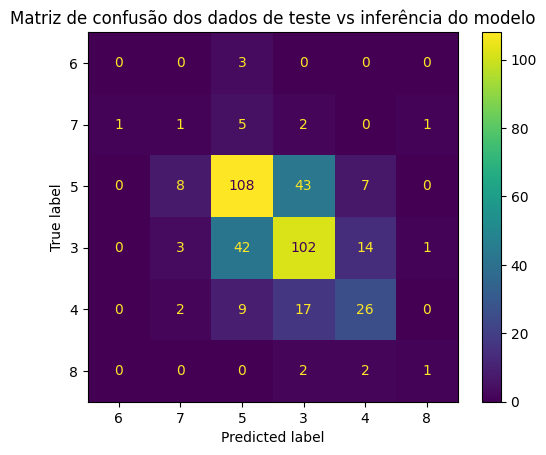

In [574]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

Analisando o Classification Report


**Dados de teste**

In [575]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.07      0.10      0.08        10
           5       0.65      0.65      0.65       166
           6       0.61      0.63      0.62       162
           7       0.53      0.48      0.50        54
           8       0.33      0.20      0.25         5

    accuracy                           0.59       400
   macro avg       0.37      0.34      0.35       400
weighted avg       0.59      0.59      0.59       400



Score do modelo utilizando os dados de teste.

In [576]:
knn.score(X=X_test_scaled, y=y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.025

#### Apresente a Curva ROC

Dado que a Curva ROC é uma métrica para valores binários, vamos fazer o cálculo de uma classe e comparar com as demais classes.

Referência:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

É preciso binarizar as variáveis independentes, calcular as probabilidades de cada predição para target e, por fim calcular a curva ROC.

In [577]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

Binarização da variável dependente, quality.

In [578]:
label_binarizer = LabelBinarizer().fit(df['quality'])

In [579]:
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(400, 6)

Selecionando a qualidade de número **5** pois foi o maior valor obtido pelo modelo.

In [580]:
class_of_interest = 5
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

Calculando as probabilidades dos dados de teste para fazer o cálculo da curva ROC.

In [581]:
y_scores = knn.predict_proba(X_test)

In [582]:
def plot_curva_ROC_one_vs_rest(y_test, y_scores):

  RocCurveDisplay.from_predictions(
      y_onehot_test[:, class_id],
      y_scores[:, class_id],
      name=f"{class_of_interest} vs as demais classes",
  )
  plt.plot([0, 1], [0, 1], "k--", label="valor de threashold (AUC = 0.5)")
  plt.axis("square")
  plt.xlabel("Taxa de Falso Positivo")
  plt.ylabel("Taxa de Verdadeira Positivo")
  plt.title("One-vs-Resto curva ROC")
  plt.legend()
  plt.show()

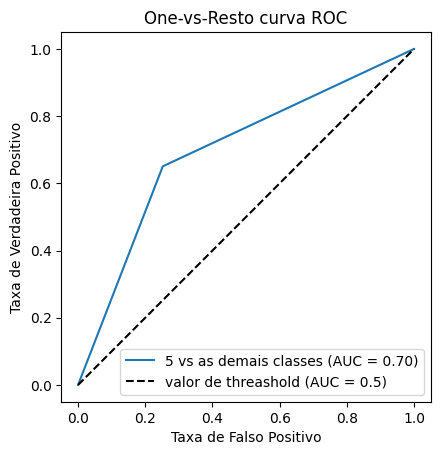

In [583]:
plot_curva_ROC_one_vs_rest(y_test, y_scores)

# Escolhendo o valor K

Vamos continuar usando o método do cotovelo para escolher um bom valor K!

Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa.

In [584]:
def train_modelo(X_train_scaled, X_test_scaled, y_train, k=1):
  print(f"Treinando o k-NN com k={k}")

  # Crie a instância do modelo KNN com n_neighbors=k
  # knn = KNeighborsClassifier(n_neighbors=k)
  knn = KNeighborsRegressor(n_neighbors=k)

  # Ajuste o modelo aos dados de treinamento
  knn.fit(X_train_scaled, y_train)

  # Faça previsões nos dados de teste
  pred_i = knn.predict(X_test_scaled)

  return pred_i


In [585]:
error_rate = []

for i in range(1,41):
    pred_i = train_modelo(X_train_scaled, X_test_scaled, y_train, i)
    #calcule e armazene os valores de erro para cada modelo treinado
    error = sqrt(mean_squared_error(y_test,pred_i))
    error_rate.append(error)

Treinando o k-NN com k=1
Treinando o k-NN com k=2
Treinando o k-NN com k=3
Treinando o k-NN com k=4
Treinando o k-NN com k=5
Treinando o k-NN com k=6
Treinando o k-NN com k=7
Treinando o k-NN com k=8
Treinando o k-NN com k=9
Treinando o k-NN com k=10
Treinando o k-NN com k=11
Treinando o k-NN com k=12
Treinando o k-NN com k=13
Treinando o k-NN com k=14
Treinando o k-NN com k=15
Treinando o k-NN com k=16
Treinando o k-NN com k=17
Treinando o k-NN com k=18
Treinando o k-NN com k=19
Treinando o k-NN com k=20
Treinando o k-NN com k=21
Treinando o k-NN com k=22
Treinando o k-NN com k=23
Treinando o k-NN com k=24
Treinando o k-NN com k=25
Treinando o k-NN com k=26
Treinando o k-NN com k=27
Treinando o k-NN com k=28
Treinando o k-NN com k=29
Treinando o k-NN com k=30
Treinando o k-NN com k=31
Treinando o k-NN com k=32
Treinando o k-NN com k=33
Treinando o k-NN com k=34
Treinando o k-NN com k=35
Treinando o k-NN com k=36
Treinando o k-NN com k=37
Treinando o k-NN com k=38
Treinando o k-NN com 

Agora crie o seguinte gráfico usando as informações do seu loop.

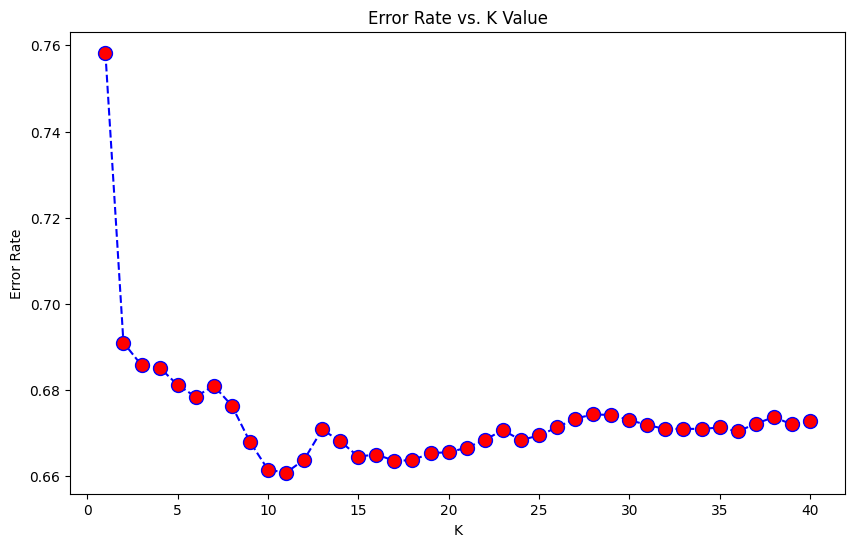

In [586]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [597]:
# Função para treinar o modelo k-NN e fazer previsões
def train_modelo(X_train_scaled, X_test_scaled, y_train, n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)  # Obtenha as previsões de rótulo de classe
    return y_pred

# Listas para armazenar resultados
k_values = range(1, 41)
res_score = []

for k in k_values:
    pred_i = train_modelo(X_train_scaled, X_test_scaled, y_train, k)

    #calcule e armazene os valores de score para cada modelo treinado
    score = accuracy_score(y_test, pred_i)  # Calcule a acurácia
    res_score.append(score)  # Armazene o valor de acurácia
    # Imprimir a lista de acurácias após o loop
print("Acurácias para cada valor de k:", res_score)



Acurácias para cada valor de k: [0.62, 0.5775, 0.5575, 0.6025, 0.56, 0.5625, 0.565, 0.59, 0.6125, 0.6175, 0.605, 0.595, 0.5875, 0.6, 0.5975, 0.5975, 0.585, 0.59, 0.57, 0.58, 0.59, 0.6, 0.595, 0.5725, 0.5775, 0.58, 0.575, 0.58, 0.5775, 0.58, 0.57, 0.5725, 0.5725, 0.5775, 0.575, 0.58, 0.57, 0.575, 0.5675, 0.57]


## Treine seu modelo novamente com novo valor K

Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão.

#### k=3

In [588]:
# Treine o modelo com k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_3 = knn.predict(X_test_scaled)

print(classification_report(y_test,y_pred_3, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        10
           5       0.63      0.67      0.65       166
           6       0.53      0.56      0.54       162
           7       0.51      0.41      0.45        54
           8       0.00      0.00      0.00         5

    accuracy                           0.56       400
   macro avg       0.28      0.27      0.27       400
weighted avg       0.55      0.56      0.55       400



Calculando as probabilidades para o modelo de k=3

In [589]:
# Prevendo as probabilidades no conjunto de teste
y_pred_proba_3 = knn.predict_proba(X_test_scaled)

# Exibindo as probabilidades
print(y_pred_proba_3)

[[0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.33333333 0.66666667 0.         0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333 0.        ]
 ...
 [0.         0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.66666667 0.33333333 0.        ]]


#### k=11

In [591]:
# Treine o modelo com k=11
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
y_pred_11 = knn.predict(X_test_scaled)

print(classification_report(y_test,y_pred_11, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        10
           5       0.66      0.74      0.70       166
           6       0.56      0.61      0.58       162
           7       0.54      0.37      0.44        54
           8       0.00      0.00      0.00         5

    accuracy                           0.60       400
   macro avg       0.29      0.29      0.29       400
weighted avg       0.58      0.60      0.59       400



Calculando as probabilidades para o modelo de k=11

In [592]:
# Prevendo as probabilidades no conjunto de teste
y_pred_proba_11 = knn.predict_proba(X_test_scaled)

# Exibindo as probabilidades
print(y_pred_proba_11)

[[0.         0.         0.45454545 0.54545455 0.         0.        ]
 [0.         0.         0.09090909 0.63636364 0.27272727 0.        ]
 [0.         0.         0.18181818 0.45454545 0.18181818 0.18181818]
 ...
 [0.         0.         0.54545455 0.09090909 0.36363636 0.        ]
 [0.         0.         0.09090909 0.09090909 0.81818182 0.        ]
 [0.         0.         0.45454545 0.45454545 0.09090909 0.        ]]


Distribuição das Probabilidades:

O primeiro exemplo ( k = 11) mostra uma distribuição mais variada das probabilidades, onde a probabilidade é dividida entre várias classes.
O segundo exemplo ( k = 3) demonstra casos onde a probabilidade é concentrada em uma única classe ou distribuída de maneira mais uniforme.

Densidade de Probabilidades:

No primeiro exemplo ( k = 11), as probabilidades são mais dispersas, o que pode indicar incerteza maior nas previsões.
No segundo exemplo ( k = 3), há casos de certeza absoluta (probabilidade 1), o que pode significar que o modelo está muito confiante em suas previsões

## Conclusão



O presente trabalho teve o objetivo de realizar análise exploratória dos dados para compreensão inicial, transformações e tratamento dos dados, assim como a divisão dos dados em duas partes: treino e teste e o treinamento de modelos de classificação em K-NN.

Os dados foram carregados, as bibliotecas necessárias foram importadas, os dados explorados e transformados.

Na parte da exploração dos dados (EDA), foi possível verificar que as doze colunas tinham dados equivalentes em relação ao tamanho (1.599.000.000), de modo que não se tornou imprescindível a limpeza dos mesmos.

Dentre as características do vinho tinto, a que apresentou a maior média foi o dióxido de enxofre total (46.467792) e a menor média foi o ácido	cítrico(0,270976). O gráfico do histograma revelou que a  característica pH foi a que teve uma distribuição mais semelhante à distribuição normal.

O gráfico de correlação demonstrou que as maiores correlações ocorreram entre acidez fixa e acidez cítrica, acidez fixa e densidade e, por fim, dioxido de sulfato livre e dioxido de sulfato total, todas com correlações igual a 0,67.

Ocorreu a divisão dos dados em treino e teste, bem como a respectiva normalização (via StandardScaler) e transformação para o formato padronizado(via transform). Pode-se concluir que a normalização  estava correta, pois através da técnica da inversão, os dados retornaram exatamente aos dados originais.

Por fim, ocorreu a aplicação da técnica do K-NN e a avaliação via X_test e Y_test, cuja acurácia do modelo foi 0.59. Foram aplicados a matriz de confusão e o relatório de classificação, com resultados para precisão, recall, f1-score e support.

Também foi realizada análise via curva ROC e para isso foi realizada transformações binárias. A análise selecionou o número 5 pois foi o maior valor obtido pelo modelo, tido como o de maior qualidade.

O método do cotovelo foi utilizado para escolher um bom valor K e treinar o modelo, com K = 3 e K = 11. O K analisado como melhor foi 11, tanto a partir do resultado do gráfico do cotovelo, como através da métrica acurácia, que foi igual a 0.60, além de outras métricas individuais.

Sobre desempenho, o segundo modelo (k = 11), com acurácia de 0.60, é superior ao primeiro - k = 3, com acurácia de 0.56. Já nas métricas Individuais, o segundo relatório mostra melhorias nas métricas ponderadas (precisão, recall e F1-score), o que pode indicar que o segundo modelo está se saindo melhor em termos de desempenho geral e é mais eficaz na classificação de amostras das classes majoritárias.

Portanto, o segundo conjunto de resultados (k = 11) sugere um modelo que tem um desempenho geral melhor em termos de acurácia e métricas ponderadas.
